# Dataset Used : KDD Cup 1999 Data

####      http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html?fbclid=IwAR39y79x4EEJqY1WlIFA6NFDNyNZG5-OkYQp3qnLtVP0mxvZrKLdo1QvcIY

### We have used 10% subset of the data because the complete dataset is too large for training.
### we use the most frequently occuring 3 types of attack in the dataset to train on and predict.


In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [55]:
names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

# Reading the training and testing sets as CSV files.

In [56]:
df = pd.read_csv('kddcup.data_10_percent_corrected.csv', names=names)
test = pd.read_csv('corrected.csv', names=names)

In [57]:
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


# Preprocessing on the dataset 
### Suggested by : https://github.com/timeamagyar/kdd-cup-99-python

## Removal of redundant features


In [58]:
df['num_outbound_cmds'].value_counts()
df.drop('num_outbound_cmds', axis=1, inplace=True)
df['is_host_login'].value_counts()
df.drop('is_host_login', axis=1, inplace=True)

## Transformation of categorical features


In [59]:
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

## Removal of duplicates


In [60]:
df.drop_duplicates(subset=None, keep='first', inplace=True)


In [61]:
df.shape
df['label'].value_counts()


normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: label, dtype: int64

## Distribution of attacks in training and test data

<Figure size 432x288 with 0 Axes>

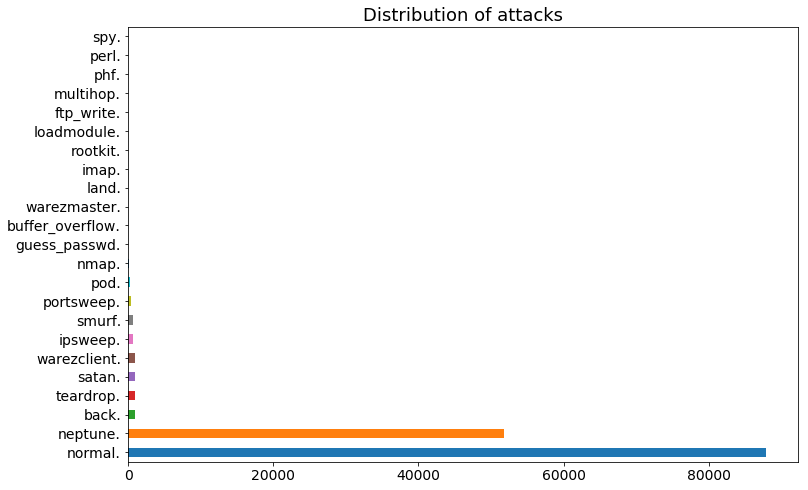

In [62]:

plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
df['label'].value_counts().plot(kind='barh')

plt.show()

<Figure size 432x288 with 0 Axes>

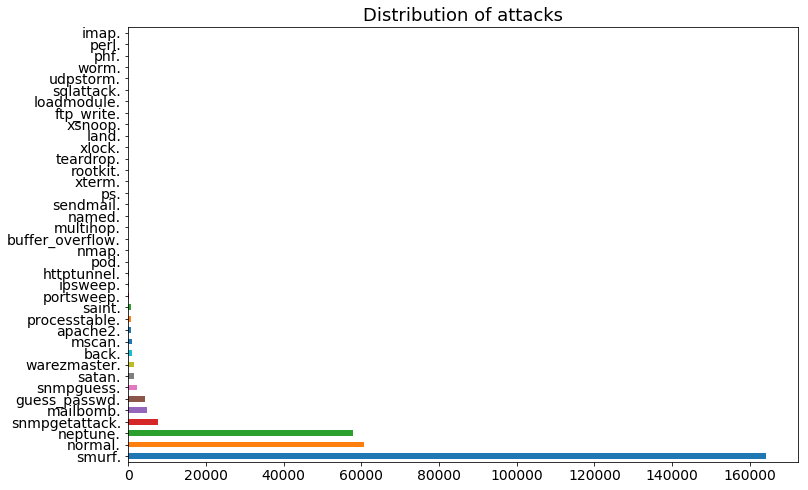

In [63]:
plt.clf()
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)
plt.title('Distribution of attacks')
#df.plot(kind='barh')
test['label'].value_counts().plot(kind='barh')

plt.show()

# As stated above, we will use neptune, back and smurf attacks to detect. in addition to the normal one.

In [64]:
# df.drop(df[~((df.label == 'teardrop.')|(df.label == 'snmpgetattack.')|df.label == 'normal.') | (df.label == 'neptune.')|(df.label == 'back.')|(df.label == 'smurf.'))].index, axis=0, inplace=True)

In [65]:
df['label'].value_counts()

normal.             87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: label, dtype: int64

## Removal of redundant features (Test set)


In [66]:
test['num_outbound_cmds'].value_counts()
test.drop('num_outbound_cmds', axis=1, inplace=True)
test['is_host_login'].value_counts()
test.drop('is_host_login', axis=1, inplace=True)

In [67]:
test.shape


(311029, 40)

In [68]:
test['label'].value_counts()


smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
xterm.                  13
rootkit.                13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
loadmodule.              2
sqlattack.               2
udpstorm.                2
worm.                    2
phf.                     2
perl.                    2
i

## Transformation of categorical features (Test set)

In [69]:
test['protocol_type'] = test['protocol_type'].astype('category')
test['service'] = test['service'].astype('category')
test['flag'] = test['flag'].astype('category')
cat_columns = test.select_dtypes(['category']).columns
test[cat_columns] = test[cat_columns].apply(lambda x: x.cat.codes)

In [70]:
# test.drop(test[~((df.label == 'teardrop.')|(df.label == 'snmpgetattack.')|(test.label == 'normal.') | (test.label == 'neptune.')|(test.label == 'back.')|(test.label == 'smurf.'))].index, axis=0, inplace=True)

In [71]:
test['label'].value_counts()


smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
xterm.                  13
rootkit.                13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
loadmodule.              2
sqlattack.               2
udpstorm.                2
worm.                    2
phf.                     2
perl.                    2
i

# Salem

## Salem

### Salem

In [72]:
train_x = df.drop('label', axis=1)
train_y = df['label']
test_x = test.drop('label', axis=1)
test_y = test['label']

In [73]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score

clf = GaussianNB()
# clf = SVC(gamma='auto')
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)
print(predictions)
print('accuracy :-',accuracy_score(test_y,predictions))
print('F1 & Percision & Recall scores is:\n-', classification_report(test_y, predictions))



['teardrop.' 'teardrop.' 'teardrop.' ... 'teardrop.' 'teardrop.'
 'teardrop.']
accuracy :- 0.849075166624334
F1 & Percision & Recall scores is:
-                   precision    recall  f1-score   support

        apache2.       0.00      0.00      0.00       794
           back.       1.00      0.97      0.98      1098
buffer_overflow.       0.00      0.05      0.01        22
      ftp_write.       0.00      0.00      0.00         3
   guess_passwd.       0.01      0.00      0.01      4367
     httptunnel.       0.00      0.00      0.00       158
           imap.       0.00      0.00      0.00         1
        ipsweep.       0.12      0.98      0.21       306
           land.       0.00      0.00      0.00         9
     loadmodule.       0.00      0.00      0.00         2
       mailbomb.       0.00      0.00      0.00      5000
          mscan.       0.00      0.00      0.00      1053
       multihop.       0.00      0.00      0.00        18
          named.       0.00      0.00    

/home/mohamedazab/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mohamedazab/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
